<h1>Seonsory Dissonance (Roughness)</h1>
<h2>MUS14.01/102 Week 1</h2> 
<h2>Prof. Casey, Dartmouth College, Department of Music</h2>

In this lab you will:

1. learn how to calculate sensory dissonance between two tones
2. use a dissonance function to compare spectra with different overtones
3. use a dissonance function to analyze works of J. S. Bach

<h2>A Dissonance Function</h2>

Following is a function for computing sensory dissonance between a set of frequency components optinally weighted by their relative amplitudes. This function implements William Sethares' algorithm from his 1998 book "Tuning, Timbre, Spectrum, Scale". 

Execute the cell by selecting it and pressing "Shift Enter". Now the function will be in the notebook's workspace. The function uses the numerical computing library numpy, and we import all of it into the current workspace with an import statement. 

In [79]:
from pylab import * # import matlab-like plotting and numerical functions
%matplotlib inline 
rcParams['figure.figsize']=(12,6) # Set the detault size for figures to large

def dissonance(freqs, amps=None, params=None):
    """                                                                                                                             
    Compute dissonance between partials with center frequencies in freqs, uses a model of critical bandwidth.                                                     
    and amplitudes in amps. Based on Sethares "Tuning, Timbre, Spectrum, Scale" (1998) after Plomp and Levelt (1965)                                                 
    
    inputs:
        freqs - list of partial frequencies
        amps - list of corresponding amplitudes [default, uniformly 1]
    """
    if params == None: params = (-3.51, -5.75, 0.0207, 19.96, 5, -5, 0.24)
    b1, b2, s1, s2, c1, c2, Dstar  = params
    f = array(freqs).flatten() # flatten to cope with lists of lists
    if amps is None: amps = [1]*len(f)
    a = array(amps).flatten()
    idx = argsort(f)
    f = f[idx]
    a = a[idx]
    N = f.size
    D = 0
    for i in range(1, N):
        Fmin = f[ 0 : N - i ]
        S = Dstar / ( s1 * Fmin + s2)
        Fdif = f[ i : N ] - f[ 0 : N - i ]
        am = a[ i : N ] * a[ 0 : N - i ]
        Dnew = am * (c1 * exp (b1 * S * Fdif) + c2 * exp(b2 * S * Fdif))
        D += Dnew.sum()
    return D

<h2>Simple Tones (1 sinusoid each tone)</h2>

In [80]:
f0 = 440 # This is the frequency of 'concert A'

# To use the dissonance function, we supply a list of frequencies
# Here, we use f0 and 2*f0, corresponding to two frequency components an octave apart
dissonance( [f0, 2*f0] )

# The answer should be close to zero, since an octave is a consonant pitch interval (but not zero, because that is reserved for the unison)

1.4487908580753865e-05

In [81]:
# Calculate the dissonance function for the interval of a perfect fifth, which is 3/2 or 1.5 * f0
dissonance( [f0, 1.5*f0] )

0.0083668433347787868

In [82]:
# Calculate dissonance for 12 equal-temperament tuning frequencies in the range of an octave
ratios = logspace(0, log10(2), 24) # Generates a list of equal-temperament frequency ratios 
print ratios

[ 1.          1.03059554  1.06212718  1.09462354  1.12811414  1.16262941
  1.19820069  1.23486029  1.27264151  1.31157867  1.35170714  1.39306335
  1.43568489  1.47961045  1.52487993  1.57153447  1.61961642  1.66916947
  1.72023862  1.77287025  1.82711218  1.88301368  1.94062551  2.        ]


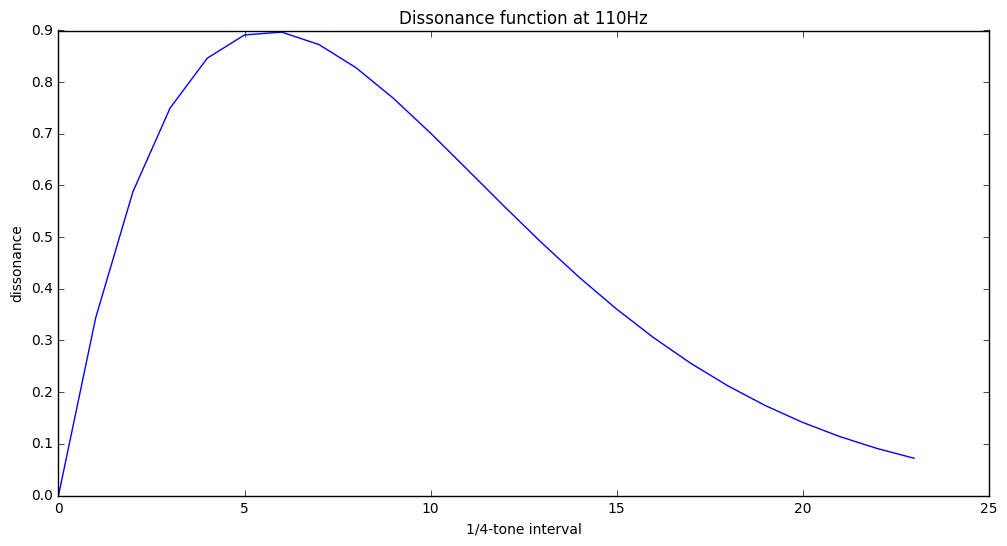

In [83]:
# Now apply the dissonacne function for each of the quarter-tone equal temperament ratios 
# for a fundamental frequency of 55Hz
f0 = 110 # Fundamental Frequency
plot( [dissonance([f0, f0*r]) for r in ratios] ) # plot dissonance for pair-wise tones between f0 and all ratios
xlabel('1/4-tone interval')
ylabel('dissonance')
t=title('Dissonance function at %dHz'%f0)

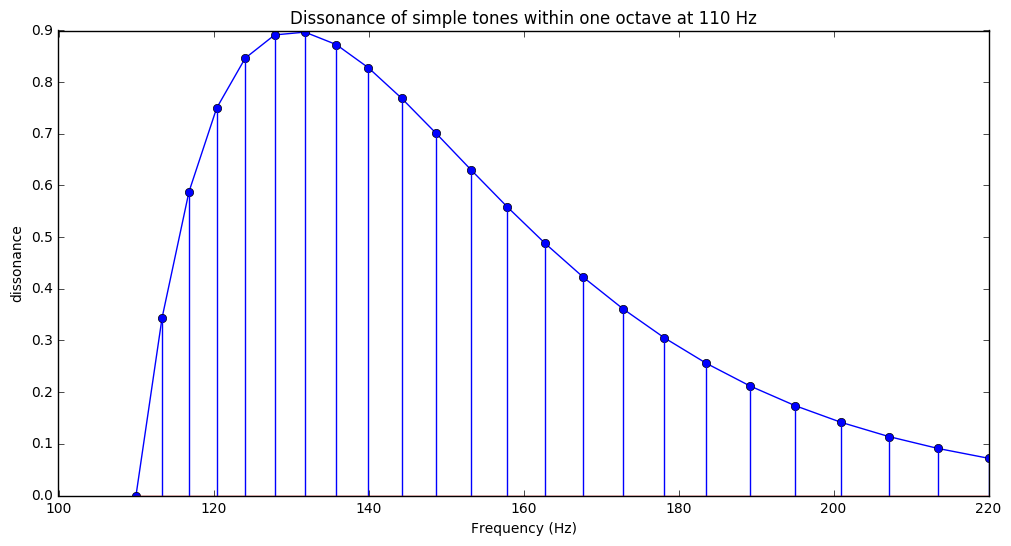

In [84]:
# Capture the output as a list and plot the result
f0 = 110 
curve = [dissonance([f0, f0*r]) for r in ratios]

# Plot the dissonance curve
freqs = f0 * ratios
plot(freqs, curve)
stem(freqs, curve)
title('Dissonance of simple tones within one octave at %d Hz'%f0)
xlabel('Frequency (Hz)')
ylabel('dissonance')


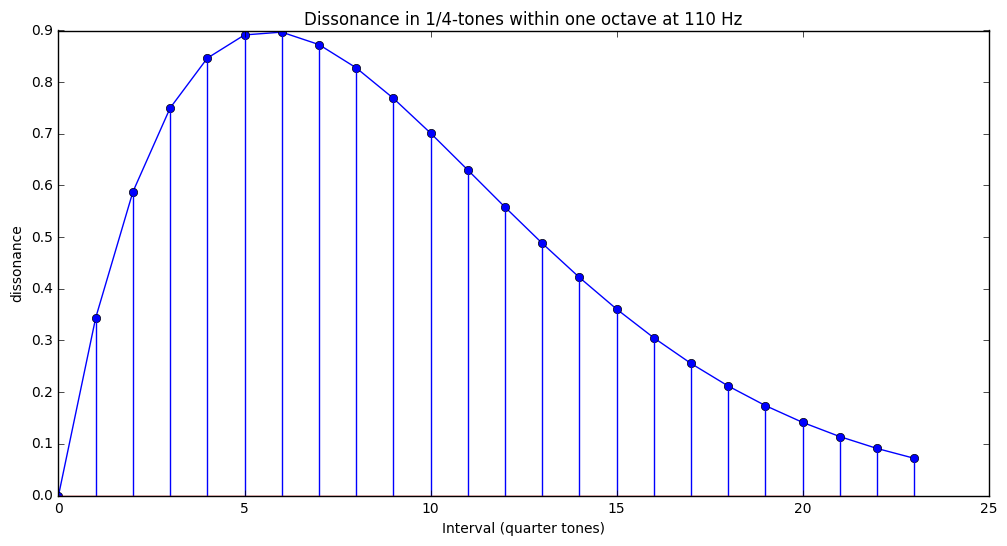

In [85]:
# The x-axis above was in frequency
# Let's see that again, but as musical intervals
# The intervals are 1/4 tones within an octave (2 x 1/4 tone = 1/2 step)
f0 = 110 
curve = [dissonance([f0, f0*r]) for r in ratios]

intervals = arange(24)
plot(intervals, curve)
stem(intervals, curve)
xlabel('Interval (quarter tones)')
ylabel('dissonance')
t=title('Dissonance in 1/4-tones within one octave at %d Hz'%f0)

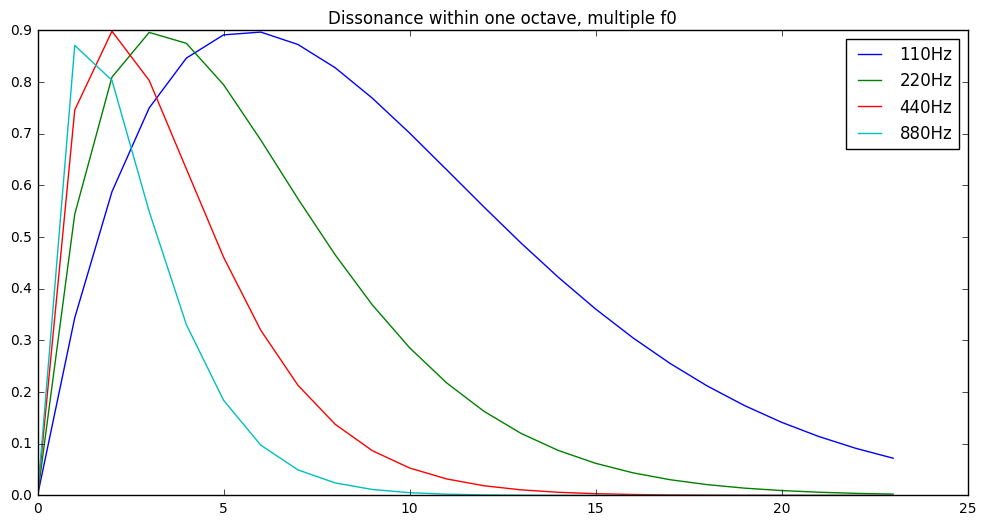

In [86]:
# Now, let's plot the same curve at different frequencies

for f0 in [110, 220, 440, 880]:
    curve = [dissonance([f0, f0*r]) for r in ratios]
    plot(curve)
legend(['110Hz','220Hz','440Hz','880Hz'])
t=title('Dissonance within one octave, multiple f0')

<h2>Complex Tones (Multiple sinsusoids each tone)</h2>

Dissonance = 0.000233076972109


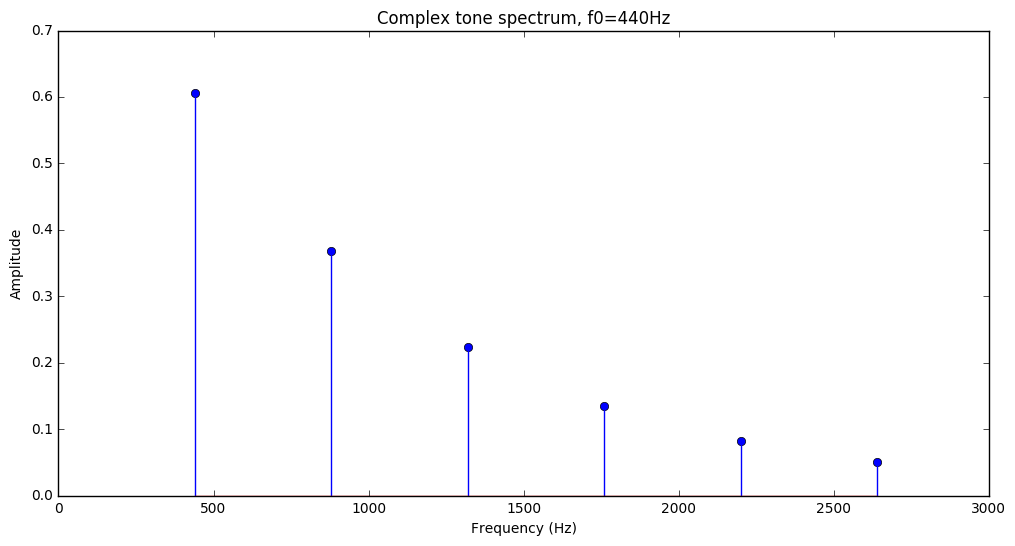

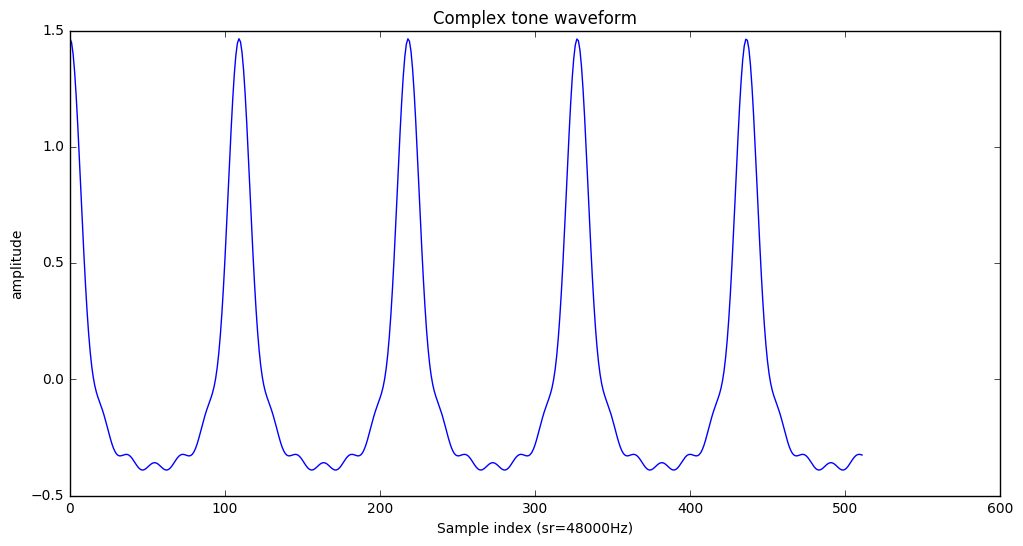

In [87]:
# Compute the dissonance for a tone with 6 harmonics 
# This sums all of the dissonances within the tone
f0 = 440
freqs0 = arange(1,7) * f0 # six harmonics beginning at f0
amps0 = exp(-0.5*arange(1,7))

stem(freqs0, amps0)
title('Complex tone spectrum, f0=%dHz'%f0)
xlabel('Frequency (Hz)')
ylabel('Amplitude')
print "Dissonance =", dissonance(freqs0, amps0)

# Plot the waveform corresponding to this spectrum (assume zero-phase)
figure()
x = zeros(512)
for f,a in zip(freqs0, amps0):
    x += a*cos(2*pi*f*arange(512)/48000.0)
plot(x)
xlabel('Sample index (sr=48000Hz)')
ylabel('amplitude')
t=title('Complex tone waveform')

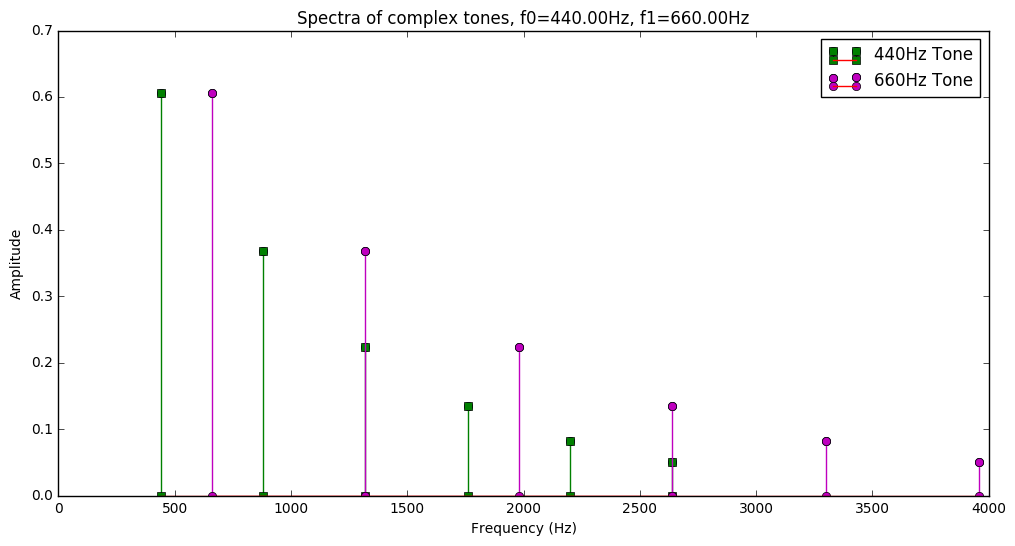

In [88]:
# Make a second complex tone at the interval of a fifth from the first
# And plot the spectra of the two tones
f1 = f0 * 1.5 # A Perfect fifth
freqs1 = arange(1,7) * f1 # six harmonics beginning at f0
amps1 = exp(-0.5*arange(1,7))

stem(freqs0,amps0,'gs-') # Colored stem plots
stem(freqs1,amps1,'mo-')
xlabel('Frequency (Hz)')
ylabel('Amplitude')
legend(['440Hz Tone','660Hz Tone'])
t=title('Spectra of complex tones, f0=%.2fHz, f1=%.2fHz'%(f0,f1))

In [89]:
# Compute the dissonance between the two tones f0 and f1 (with amplitudes freqs1 and amps1)
dissonance([freqs0, freqs1],[amps0, amps1])

0.016817618138729156

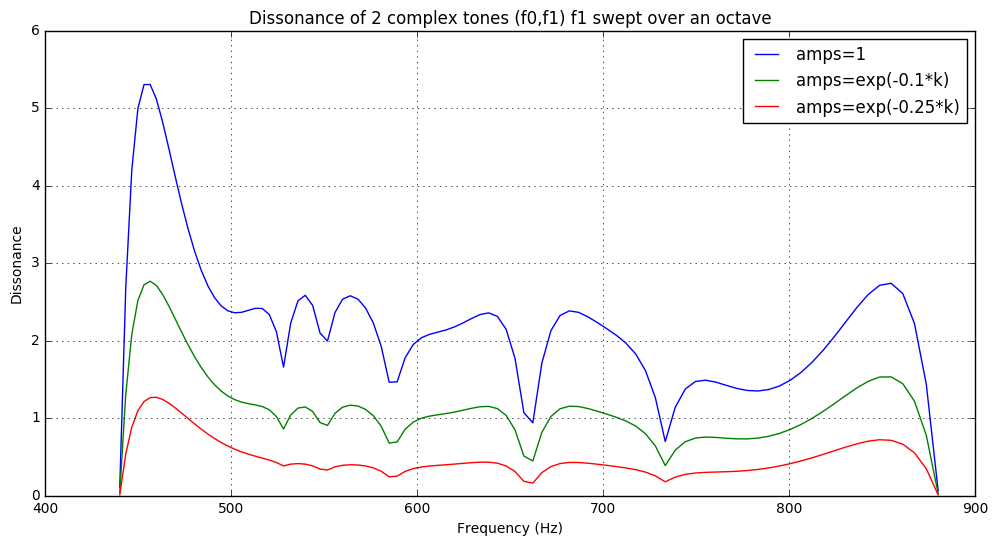

In [90]:
# Compute dissonance between two complex tones with fundamental frequencies f0 and f1 
# for a sweep of the upper tone over an octave

ratios = logspace(0, log10(2), 96) # sixteenth-tone frequency ratio spacing (for better resolution)
df = [dissonance([freqs0, arange(1,7)*f0*r]) for r in ratios]
plot(f0*ratios,df)
grid()
xlabel('Frequency (Hz)')
ylabel('Dissonance')

# Plot with exponentially weight amplitudes
amps2 = exp(-0.1*arange(1,7))
df2 = [dissonance([freqs0, arange(1,7)*f0*r],[amps2,amps2]) for r in ratios]
plot(f0*ratios,df2)

amps3 = exp(-0.25*arange(1,7))
df3 = [dissonance([freqs0, arange(1,7)*f0*r],[amps3,amps3]) for r in ratios]
plot(f0*ratios,df3)

legend(['amps=1','amps=exp(-0.1*k)','amps=exp(-0.25*k)'])
t = title('Dissonance of 2 complex tones (f0,f1) f1 swept over an octave')


<h2>QUESTION 1. Dissonance of Complex Tones</h2>

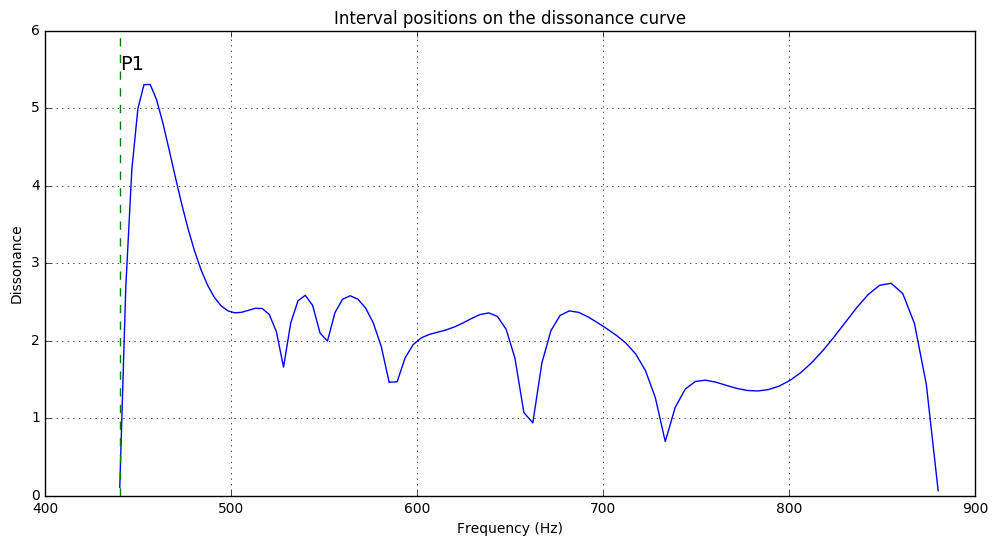

In [91]:
# Label the positions of intervals M2, M3, P4, P5, M6, M7, and P8 on the following graph
ratios = logspace(0, log10(2), 96) # sixteenth-tone frequency ratio spacing (for better resolution)
df = [dissonance([freqs0, arange(1,7)*f0*r]) for r in ratios]
plot(f0*ratios,df)
grid()
xlabel('Frequency (Hz)')
ylabel('Dissonance')

# HINT: Here is the label for the first interval (Unison: f1 = 1*f0
plot([1*f0,1*f0],[0,6],'--') # Make a dashed vertical line
text(1*f0, 5.5, 'P1', fontsize=14) # Write a text label

# COMPLETE FOR ALL 7 INTERVALS M2, M3, P4, P5, M6, M7, and P8 
# Use the hint on the two lines above.



t=title('Interval positions on the dissonance curve')

<h2>Dissonance in a Musical Score</h2>
<h3>Use of Dissonance in Bach's Well-Tempered Clavier</h3>
The folder called BachWTC1 contains each pair of Prelude/Fugue in every major and minor key

The numbering goes like this:

01.ascii - Prelude No.1 in C Major
02.ascii - Fugue No.1 in C Major
03.ascii - Prelude No.2 in C# Major
04.ascii - Fugue No.2 in C# Major
...
47.ascii - Prelude No. 24 in B Minor
48.ascii - Fugue No. 24 in B Minor

BOOK 2:
49.ascii - Prelude No. 25 in C Major
50.ascii - Fugue No. 25 in C Major
... 
95.ascii - Prelude No. 48 in B Minor
96.ascii - Fugue No. 48 in B Minor

In [92]:
Prelude01 = loadtxt('BachWTC1/01.ascii') # WTC Book 1, Prelude in C Major
# Inspect the array by checking its size
Prelude01.shape

(128, 560)

In [93]:
# Look at the data (To much data to see in text form)
Prelude01

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [121]:
# Make a function to sensibly plot these files
def show_score(S):
    imshow(S, aspect='auto', origin='bottom', interpolation='nearest', cmap=cm.gray_r)
    xlabel('Time')
    ylabel('Pitch')
    pc=array(['C','C#','D','Eb','E','F','F#','G','Ab','A','Bb','B'])
    idx = tile([0,4,7],13)[:128]
    yticks(arange(0,128,4),pc[idx], fontsize=10)

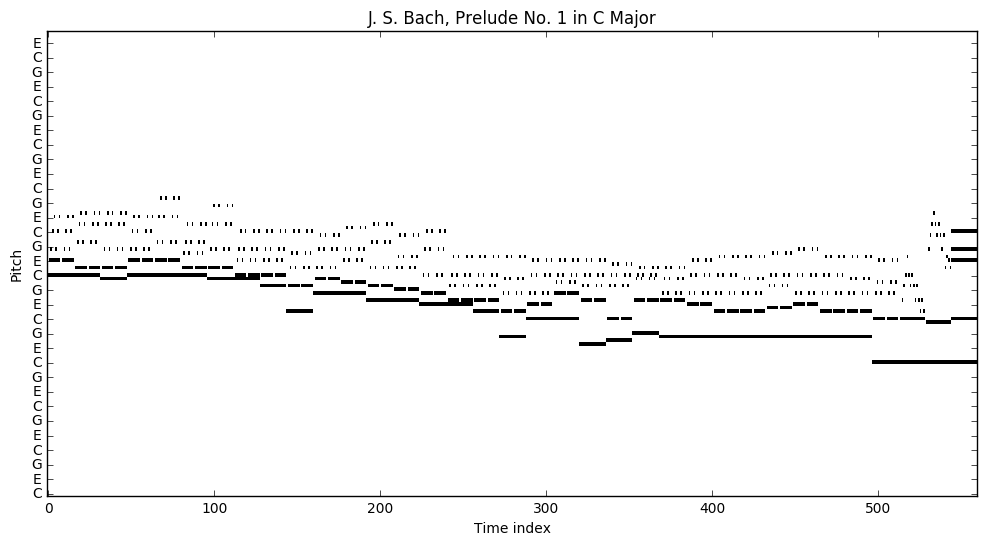

In [122]:
show_score(Prelude01)
ylabel('Pitch')
xlabel('Time index')
t=title('J. S. Bach, Prelude No. 1 in C Major')

In [123]:
# The following function allows us to compute dissonance over the whole score
def dissonance_score(A):
    """                                                                                                                              
    Given a piano-roll indicator matrix representation of a musical work (128 pitches x beats),                                      
    return the dissonance as a function of beats.                                                                                    
    Input:                                                                                                                           
        A  - 128 x beats indicator matrix of MIDI pitch number                                                                       
                                                                                                                                     
    """
    freq_rats = arange(1,11) # Harmonic series ratios                                                                             
    amps = exp(-.5 * freq_rats) # Partial amplitudes                                                                              
    F0 = 8.1757989156 # base frequency for MIDI (note 0)                                                                             
    diss = [] # List for dissonance values                                                                                           
    thresh = 1e-3
    for beat in A.T:
        idx = where(beat>thresh)[0]
        if len(idx):
            freqs, mags = [], [] # lists for frequencies, mags                                                                       
            for i in idx:
                freqs.extend(F0*2**(i/12.0)*freq_rats)
                mags.extend(amps)
            freqs = array(freqs)
            mags = array(mags)
            sortIdx = freqs.argsort()
            d = dissonance(freqs[sortIdx],mags[sortIdx])
            diss.extend([d])
        else:
            diss.extend([-1]) # Null value                                                                                           
    return array(diss)


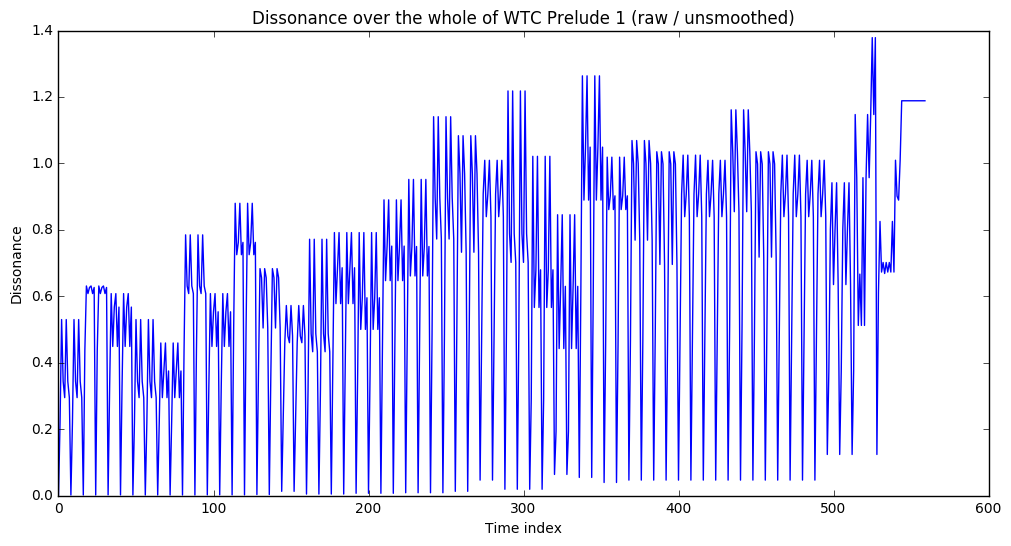

In [124]:
plot(dissonance_score(Prelude01))
xlabel('Time index')
ylabel('Dissonance')
t=title('Dissonance over the whole of WTC Prelude 1 (raw / unsmoothed)')

<h3>Temporal Integration of Data for Smoother Dissonance Measure</h3>

In [125]:
# The above dissonance plot is not smooth because the time-scale of the analysis is 1/8th notes; 
# hence, the dissonance function changes non-smoothly on every beat. 
#
# The following function will smooth the score by temporally integrating the score matrix over a fixed number of beats.
def win_mtx(a, win_len=8):
    """                                                                                                                              
    Options:                                                                                                                         
        win_len  - window length [8]                                                                                                 
    """
    # perform simple integration                                                                                                     
    N = int(ceil(a.shape[1]/float(win_len)))
    aa = []
    for k in arange(N-1):
        aa.append(a[:,k*win_len:(k+1)*win_len].mean(1)) # temporally integrate by teking the mean of axis 1
    return vstack(aa).T

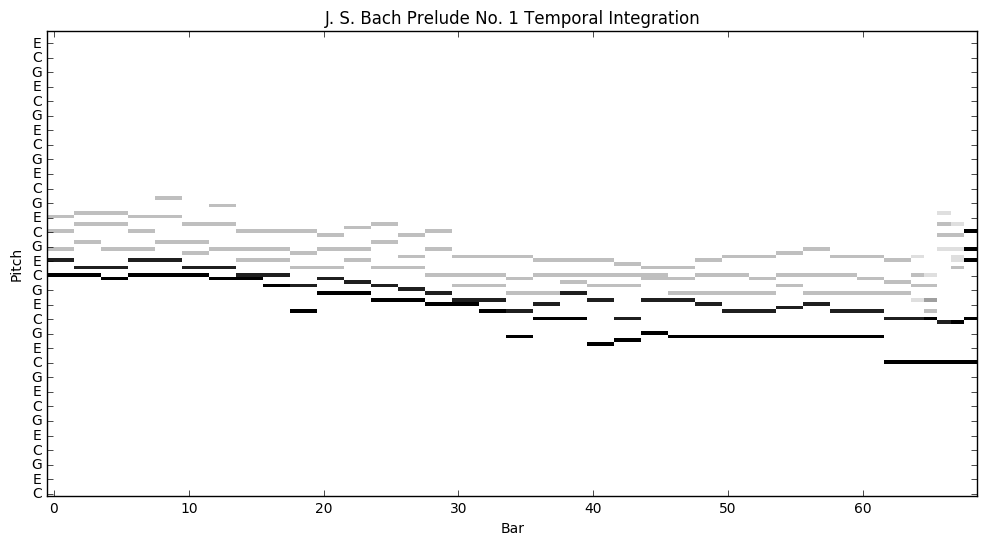

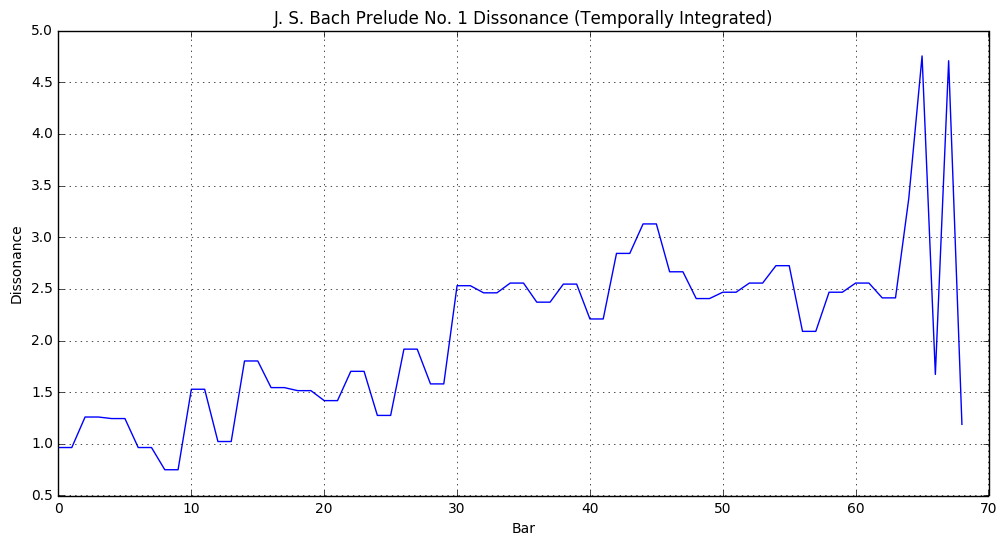

In [126]:
# Now we can smooth the score using win_mtx
# Each bar consists of a repeated pitch pattern of one chord
# The pulse is 1/8th note (the smallest duration used in the work)
# So, we integrate over 8 pulses, the length of one bar
Prelude01_integrated = win_mtx(Prelude01, 8)

show_score(Prelude01_integrated)
xlabel('Bar')
ylabel('Pitch')
t=title('J. S. Bach Prelude No. 1 Temporal Integration')

figure()
plot(dissonance_score(Prelude01_integrated))
xlabel('Bar')
ylabel('Dissonance')
grid()
t=title('J. S. Bach Prelude No. 1 Dissonance (Temporally Integrated)')

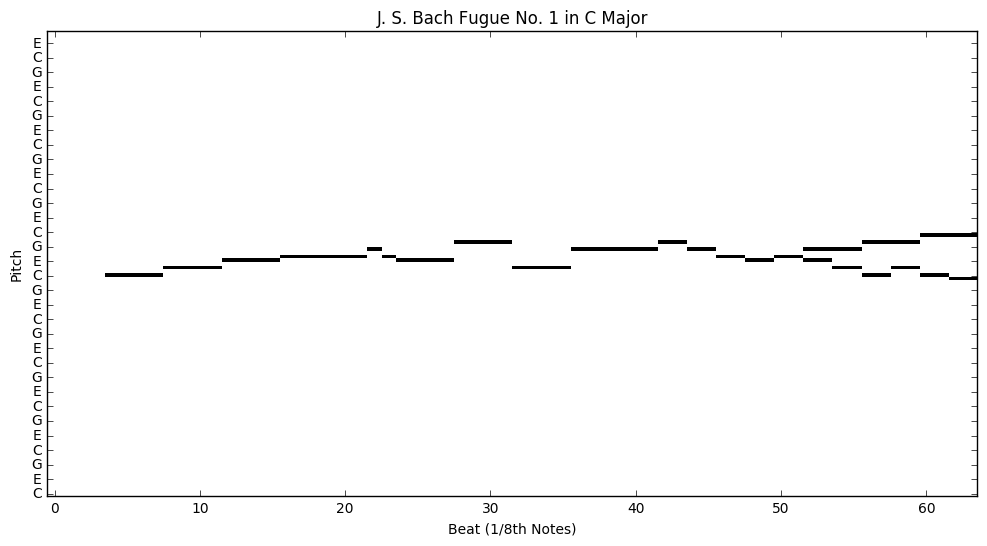

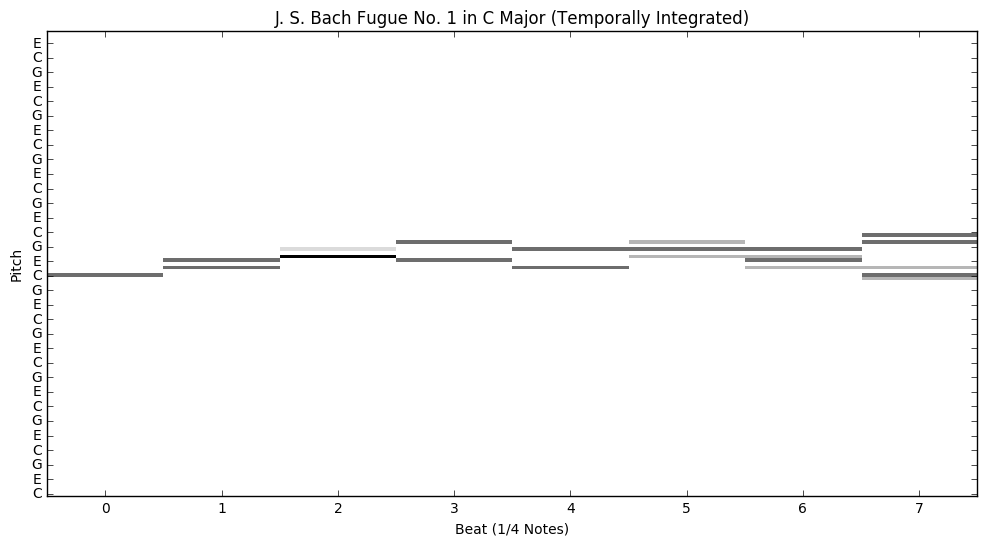

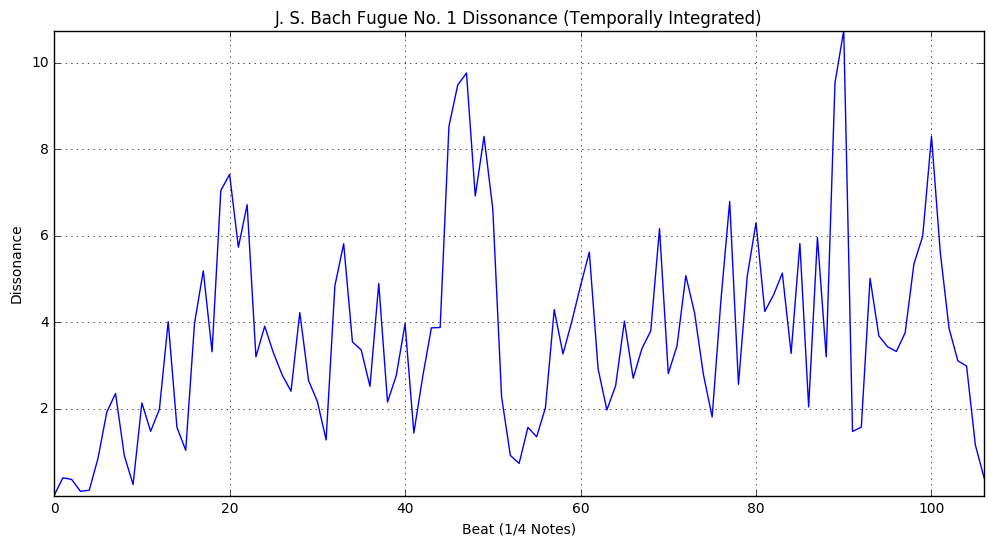

In [141]:
# Let's look at the Fugue in C Major in the same way
# Step 1: Load the ASCII file corresponding to Fugure No. 1 = 02.ascii
# Step 2: Smooth the score using win_mtx, the pulse is 1/32nd note
#         The "harmonic rate" is faster in the Fugue than the Prelude, with chords changing every quarter note
#         so we integrate over 8 x 1/32nd notes which yields smoothing at the quarter-note level (32/8 = 4) 
# Step 3: Compute the dissonance

Fugue01 = loadtxt('BachWTC1/02.ascii') # WTC Book 1, Fugue in C Major
Fugue01_integrated = win_mtx(Fugue01, 8) # Integrate to quarter notes (pulse is 1/32nd note)
Fugue01_dissonance = dissonance_score(Fugue01_integrated)

figure()
show_score(Fugue01[:,:64]) # Just show the first two bars (64 x 1/32 note)
xlabel('Beat (1/8th Notes)')
ylabel('Pitch')
title('J. S. Bach Fugue No. 1 in C Major')

figure()
show_score(Fugue01_integrated[:,:8]) # Show the first two bars (8 x 1/4 notes)
xlabel('Beat (1/4 Notes)')
ylabel('Pitch')
title('J. S. Bach Fugue No. 1 in C Major (Temporally Integrated)')

figure()
plot(Fugue01_dissonance)
xlabel('Beat (1/4 Notes)')
ylabel('Dissonance')
grid()
axis('tight') # Remove blank space in figure
t = title('J. S. Bach Fugue No. 1 Dissonance (Temporally Integrated)')

<h2>Question 2: Analysis of Dissonance in Musical Works</h2>

i. Listen to a recording of J. S. Bach's Fugue No. 1 in C Major from the Well-Tempered Clavier (BWV 846)
ii. Referring to the figure above, write a brief analysis of the use of dissonance in the Fugue No. 1

Write Your Answer here:


In [ ]:
# 1. Choose another work in WTC. 
# 2. Listen to it
# 3. Determine what he HARMONIC RATE is (how often do the chords change)
# 4. The pulse of the score will be the shortest duration, so integrate over the correct number of pulses to 
# create a smoothed score at the harmonic rate.
# 5. Plot and label the non-integrated score
# 6. Plot and label the integrated score
# 7. Plot the smoothed dissonance function for your chosen work.
# 8. Provide a brief analysis of the use of dissonance in the work, drawing form the dissonance function and 
#   using your knowledge of musical form, counterpoint, and harmony.


<h2>Question 3 (Required for Graduate Students; Optional Extra Credit for Undergraduates)</h2>

Using whatever means you have at your disposal (Python, MaxMSP, PureData, SuperCollider, Electronic, Acoustic, etc.) create a work of between 60 seconds and 180 seconds duration that follows a pre-determined dissonance curve. 

1. Make a chart of the work's plan (i.e. the intended dissonance curve) 

2. Create an audio file of the work, using whatever means you can.

3. OPTIONAL / EXTRA CREDIT: using an audio feature extraction toolkit, extract the peaks of the spectrum from your audio file. Spectral peaks consist of lists of frequencies and amplitudes, with a new list for every analysis frame (time).

4. Use the dissonance() function with spectral peaks and amplitudes as the arguments to perform a sensory dissonance (roughness) analysis of your work. How closely does the dissonance function match your work's plan ? How could you make them closer?

Notes on Question 3 part 4

The presence or absence of peaks in the spectrum for a windowed portion of an audio signal are due to a number of inter-related factors:
    a. sinusoidal  components (narrow-band)
    b. resonances / filtering (wide-band) 
    c. noise

Due to the [uncertainty principle](http://sepwww.stanford.edu/sep/prof/fgdp/c4/paper_html/node2.html), we perform a spectral peak analysis to be selective for either narrow-band components (longer analysis windows, e.g. n=16384 @ 44100Hz sample rate) or for wide-bands components (shorter analysis windows, e.g. n=512 @ 44100Hz sample rate). In both cases, we can control the time-scale of the window step independently of the time-scale of the spectrum by changing the degree of overlap between analysis windows (the hop). By trading off these parameters, we can focus more on 'harmonics' and 'partials', or more on 'resonances' or 'formants', thus biasing the analysis either toward pitch or toward timbre. In this way, we can organize spectral musical elements according to degrees of sensory roughness, the phsyiological analog to dissonacne.

For more information on spectral peak analysis, see:
    1. [Spectral Peak Detection](http://ccrma.stanford.edu/~jos/parshl/Peak_Detection_Steps_3.html)
    2. The [Essentia audio feature extraction toolkit](http://essentia.upf.edu/documentation/reference/streaming_SpectralPeaks.html)
    3. There are also implementations of spectral peak tracking (sinusoidal modeling) in Max/MSP, PureData, SuperCollider, and other computer music software platforms
    
    Finally: The Ear-Brain beats the uncertainty principle by performing analysis at multiple time-scales. This means that the brain simultaneously encodes slow-time sharp-frequency information (pitch: right auditory cortex) and fast-time wide-frequency information (timbre: left auditory cortex). 
    
    So, the left-brain and right-brain auditory cortices work together to beat the theoretical limit of the time-frequency uncertainty principle. See https://arxiv.org/abs/1208.4611   